<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/REF0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,random_state=1 )
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model=DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluation model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# resort performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.856 (0.028)


Evaluate the model

In [12]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# define dataset 
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model=DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])
# fit the model on all available data
pipeline.fit(X, y)
# make a prediction for one example
data = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057,
-2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' %(yhat))

Predicted Class: 1


RFE for Regression

In [4]:
from sklearn.datasets import make_regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe), ('m', model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f' %(mean(n_scores), std(n_scores)))

MAE: -27.300 (3.100


# Make prediction for example

In [7]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline= Pipeline(steps=[('s', rfe),('m',model)])
# fit the model
pipeline.fit(X, y)
# make a prediction for example
data = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381,
0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = pipeline.predict(data)
print('Predicted: %.3f'%(yhat))


Predicted: -84.288


Explore # Features

>2 0.713 (0.042)
>3 0.826 (0.029)
>4 0.871 (0.028)
>5 0.890 (0.030)
>6 0.883 (0.028)
>7 0.888 (0.027)
>8 0.887 (0.024)
>9 0.885 (0.029)


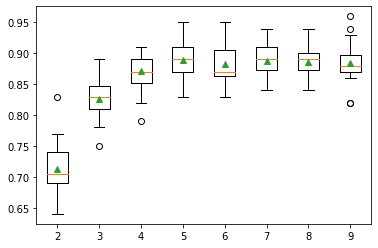

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,random_state=1)
  return X, y

# get a list of models to evaluate
def get_models():
  models = dict()
  for i in range(2, 10):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    model = DecisionTreeClassifier()
    models[str(i)] = Pipeline(steps=[('s', rfe),('m', model)])
  return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores),std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Automatically select the number of Features

In [13]:
# automatically choose the number of features
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuarcy: %.3f (%.3f)' %(mean(n_scores), std(n_scores)))
 

Accuarcy: 0.889 (0.032)


Report features are selected

In [15]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# define dataset 
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
for i in range(X.shape[1]):
  print('Column: %d, Selected=%s, Rank: %d' %(i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 5
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 6
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3


Explore Base Algorithm

>cart 0.891 (0.034)
>lr 0.895 (0.030)
>per nan (nan)
>rf 0.857 (0.037)
>gbm 0.889 (0.027)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


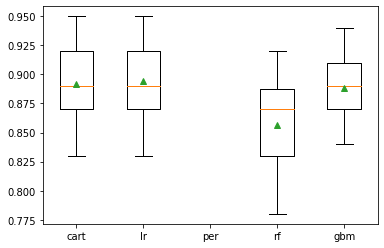

In [28]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
  return X, y

# get a list model to evaluate
def get_models():
  models= dict()
  # cart
  rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select= 5)
  model = DecisionTreeClassifier()
  models['cart'] = Pipeline(steps=[('s', rfe), ('m', model)])
  # lr
  rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['lr'] = Pipeline(steps=[('s', rfe), ('m', model)])
  # perceptron
  rfe = RFE(estimator=Perceptron, n_features_to_select= 5)
  model = DecisionTreeClassifier()
  models['per'] = Pipeline(steps=[('s', rfe),('m', model)])
  # rf
  rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select= 5)
  model = DecisionTreeClassifier()
  models['rf'] = Pipeline(steps=[('s', rfe),('m', model)])
  # gbm
  rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select= 5)
  model = DecisionTreeClassifier()
  models['gbm'] = Pipeline(steps=[('s',rfe), ('m', model)])
  return models

# evaluate a given model using cross-validation
def evaluate_model(X, y, model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

# define dataset
X, y = get_dataset()
models = get_models()
# evaluate the models and store reults
results, names = list(), list()
for name, model  in models.items():
  scores = evaluate_model(X, y, model)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)'% (name, mean(scores),std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()